### The Typical Brothers (TP, FP, TN, FN)

Object Detection at its core is a complicated algorithm comprising of both regression and classification. We first define the 4 good brothers that we see in a typical **classification problem**.

Note in usual classification problem, we will have a probabality logit at the end of a softmax/sigmoid layer, which aids us in determining whether a classification belongs to TP, FP, TN or FN.
In object detection, we use the **IOU** to determine if a given a bounding box prediction belongs to the four brothers.

Let us define:

- $\y$: 1 single ground truth bbox;
- $\yhat$: 1 single predicted bbox;
- $\iou(\y, \yhat)$: The IOU between them.
- $t$: The threshold for IOU to cross for it to be a positive, defaults to $0.5$.

Then:

- TP: The model classified it as positive and it indeed is positive; $\yhat$ is TP iff $\iou(\y, \yhat) > t$; both the predictor and the ground truth are in agreement;
- FP: The model classified it as positive but it is negative; $\yhat$ is FP iff $\iou(\y, \yhat) < t$; the predictor raised a false alarm that there is an object but there actually isn't;
- FN: The model classified it as negative but it is positive; $\yhat$ is FN iff there exists a ground truth $\y$ that is not detected by our model;
- TN: This is usually ignored since it means that both the predictor and the annotator ground truth did not have a bounding box; it is often termed as **correct rejections** because there exist infinite places on an image where there are no bounding boxes from both the predictor and the annotator.

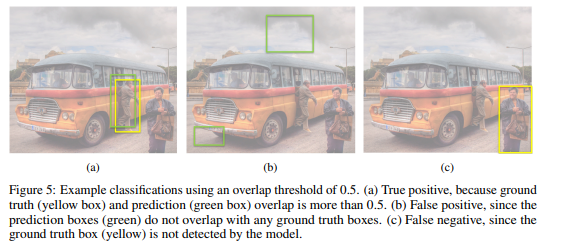

### The Iconic DUO (Precision and Recall)

As with any other classification problem, we will see this iconic duo. Let us recap these 2 metrics in the settings of object detection.

### Precision

> **Precision measures how many of the samples predicted as positive are actually positive. Mathematically, it is expressed as:**

$$
\text{Precision} = \dfrac{\text{TP}}{\text{TP} + \text{FP}}=P(Y=1 | \hat{Y} = 1)
$$

---

> A Probablistic Interpretation
    Notice that the above definition has a probabilitic interpretation $P(Y = 1 | \hat{Y} = 1)$, where $Y$ and $\hat{Y}$ refers to the actual label and predicted labels respectively. We interpreted precision and recall not as ratios but as [estimations of probabilities](https://en.wikipedia.org/wiki/Precision_and_recall).
    Precision is then the estimated probability that a random point selected from the samples are positive. This might be a tough pill to swallow as someone who was never good in statistics but it is just conditional probability. If you try to think a bit further, you can form an intuition as follows:
    > If your classifier $h$ is trained and the last layer is say, sigmoid, which in binary classification, calibrates the logits and turn them into probabilities. Then it can be interpretated that given a randomly chosen point $x \in X_{train}$, what is the probability of this point $x$ to be positive given that it is predicted as positive by the classifer?

---

Informally, precision answers the question **what proportion of positive predictions was actually correct**? In other words, out of all the positive predictions made by the model, how many of those positive predictions were actually positive when compared to the ground truth?

> **In object detection, precision can be throught of as the fraction of correct object predictions among all objects detected by the model**

### Recall

> **Recall measures the following: out of all the actual positives (say, the real cancer patients), how many of them were identified correctly by the classifier? Mathematically, it is expressed as:**
    
$$
\text{Recall}= \dfrac{\text{TP}}{\text{TP} + \text{FN}}= P(\hat{Y}=1 | Y = 1)=1-FNR
$$

From the formula, we see the denominator to be defined as TP + FN, which is unsurprising as this gives you the actual number of positives. The dynamics is also similar to the one in precision.

> **In object detection, recall can be thought of as the fraction of ground truth objects that are correctly detected by the model.**

### Recall vs Precision

The tug of war between this duo is still present, that is to say, as precision goes down, recall might go up and vice versa.

Note that precision and recall are parametrized by the IOU threshold $t$, that means, for each threshold $t$, we can calculate the pair of precision and recall score.

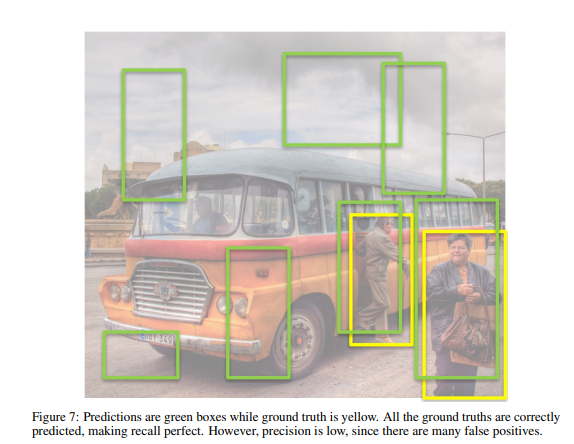